# BOW implementation  
A BoW is a representation technique for documents by counting the words in them. The main data structure of the technique is a document-term matrix.  

## TF-IDF Vectorizer
The following piece of code illustrates how to build a document-term matrix with the Python sklearn library for a toy corpus of three sentences:


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer 
import numpy as np
import pandas as pd

toy_corpus= ["the fat cat sat on the mat",
             "the big cat slept",
             "the dog chased a cat"]
vectorizer=TfidfVectorizer(use_idf=True)

corpus_tfidf=vectorizer.fit_transform(toy_corpus)

print(f"The vocabulary size is {len(vectorizer.vocabulary_.keys())} ")
print(f"The document-term matrix shape is {corpus_tfidf.shape}")

df=pd.DataFrame(np.round(corpus_tfidf.toarray(),2))
df.columns=vectorizer.get_feature_names_out()
df

The vocabulary size is 10 
The document-term matrix shape is (3, 10)


,big,cat,chased,dog,fat,mat,on,sat,slept,the
0,0.00,0.25,0.00,0.00,0.42,0.42,0.42,0.42,0.00,0.49
1,0.61,0.36,0.00,0.00,0.00,0.00,0.00,0.00,0.61,0.36
2,0.00,0.36,0.61,0.61,0.00,0.00,0.00,0.00,0.00,0.36


The table indicates a count-based mathematical matrix where the cell values are transformed by a Term Frequency-Inverse Document Frequency (TF-IDF) weighting schema.  
Each column in the matrix stands for the vector of a word in the vocabulary, and each row stands for the vector of a document.

This approach does not care about the position of words. Since the word order strongly determines the meaning, ignoring it leads to a loss of meaning. This is a common problem in a BoW method, which is finally solved by a recursion mechanism in RNN and positional encoding in Transformers.  

we can use bigrams (e.g. `cat_sat` or `the_streat`) to enrich the document representation

In [3]:
corpus_tfidf

<3x10 sparse matrix of type '<class 'numpy.float64'>'
	with 14 stored elements in Compressed Sparse Row format>

## Classification
For the Natural Language Understanding (NLU) tasks, the traditional pipeline starts with some preparation steps, such as tokenization, stemming, noun phrase detection, chunking, stop-word elimination, and much more. Afterward, a document-term matrix is constructed with any weighting schema, where TF-IDF is the most popular one. Finally, the matrix is served as a tabulated input for Machine Learning (ML) pipelines, sentiment analysis, document similarity, document clustering, or measuring the relevancy score between a query and a document. Likewise, terms are represented as a tabular matrix and can be input for a token classification problem where we can apply named-entity recognition, semantic relation extractions, and so on.

In [4]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
labels= [0,1,0]
clf =  SVC()
clf.fit(df, labels)

SVC()

In [5]:
clf.predict(df)

array([0, 1, 0])

# Building a LM Model 
Once we prepared our corpus above, we are ready to start training Maximum Likelihood Estimator (MLE) as a Language Model.  

For language-generation problems, the traditional approaches are based on leveraging n-gram language models. This is also called a Markov process, which is a stochastic model in which each word (event) depends on a subset of previous words—unigram, bigram, or n-gram, outlined as follows:

- Unigram (all words are independent and no chain): This estimates the probability of word in a vocabulary simply computed by the frequency of it to the total word count.  
- Bigram (First-order Markov process): This estimates the $P(word_i | word_{i -1})$. probability of $word_i$ depending on $word_{i-1}$, which is simply computed by the ratio of $P(word_i , word_{i-1})$ to $P(word_{i-1})$.

- Ngram (N-order Markov process): This estimates $P(word_i | word_0, ..., word_{i-1})$.

## Training a bigram LM
In the following implementation, we train a Maximum Likelihood Estimator (MLE) with order n=2. We can select any n-gram order such as n=1 for unigrams, n=2 for bigrams, n=3 for trigrams, and so forth

In [ ]:
# !pip install nltk==3.5.0

In [2]:
import nltk
from nltk.corpus import gutenberg
from nltk.lm import MLE
from nltk.lm.preprocessing import padded_everygram_pipeline

nltk.download('gutenberg')
nltk.download('punkt')
macbeth = gutenberg.sents('shakespeare-macbeth.txt')

model, vocab = padded_everygram_pipeline(2, macbeth)
lm=MLE(2)
lm.fit(model,vocab)
print(list(lm.vocab)[:40])
print(f"The number of words is {len(lm.vocab)}")


[nltk_data] Downloading package gutenberg to /home/guy/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /home/guy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['<s>', '[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', 'William', 'Shakespeare', '1603', ']', '</s>', 'Actus', 'Primus', '.', 'Scoena', 'Prima', 'Thunder', 'and', 'Lightning', 'Enter', 'three', 'Witches', '1', 'When', 'shall', 'we', 'meet', 'againe', '?', 'In', ',', 'or', 'in', 'Raine', '2', 'the', 'Hurley', '-', 'burley']
The number of words is 4020


In [7]:
print(macbeth[42])

['So', 'well', 'thy', 'words', 'become', 'thee', ',', 'as', 'thy', 'wounds', ',', 'They', 'smack', 'of', 'Honor', 'both', ':', 'Goe', 'get', 'him', 'Surgeons', '.']


## See what LM learned

Here is a list of what the language model learded so far

In [8]:
print(f"The frequency of the term 'Macbeth' is {lm.counts['Macbeth']}")
print(f"The language model probability score of 'Macbeth' is {lm.score('Macbeth')}")
print(f"The number of times 'Macbeth' follows 'Enter' is {lm.counts[['Enter']]['Macbeth']} ")
print(f"P(Macbeth | Enter) is {lm.score('Macbeth', ['Enter'])}")
print(f"P(shaking | for) is {lm.score('shaking', ['for'])}")

The frequency of the term 'Macbeth' is 61
The language model probability score of 'Macbeth' is 0.0022631149365585812
The number of times 'Macbeth' follows 'Enter' is 15 
P(Macbeth | Enter) is 0.1875
P(shaking | for) is 0.012195121951219513


## Language Generation with LM

To generate one word

In [8]:
lm.generate(1, random_seed=42)

'done'

To generate a sentence of 7 words length

In [9]:
print(lm.generate(7, random_seed=42))

['done', ',', 'Not', 'for', 'thee', 'in', 'this']


To generate 10 words starting with \<s>

In [10]:
lm.generate(10, text_seed=['<s>'], random_seed=42)

['My', 'Bosome', 'franchis', "'", 's', 'of', 'time', ',', 'We', 'are']

# Leveraging Deep Learning

so far we've seen some methods to represent text using classical methods (BOW with document-term matrix) and building a language model with MLE (n-gram)
in the era of deep learning, the models allowed learning a better representation for text - a replacement for the BoW approach. 
the idea is to represent word in a continuous space that is much more compact than the 1-hot (of size |V| or size |N|).

the first model to do it is `Word2vec` which is a popular word-embedding technique. It used a simple and effective architecture to learn a high quality of continuous word representations. It maximizes the probability of the current word given any surrounding context words, or vice versa.

## Word Embeddings Training
The following piece of code illustrates how to train word vectors for the sentences of the play Macbeth.  
The code trains the word embeddings with a vector size of 100 by a sliding 5-length context window.

In [4]:
# !pip install gensim==3.8.3
Word2Vec?

Init signature:
Word2Vec(
    sentences=None,
    corpus_file=None,
    vector_size=100,
    alpha=0.025,
    window=5,
    min_count=5,
    max_vocab_size=None,
    sample=0.001,
    seed=1,
    workers=3,
    min_alpha=0.0001,
    sg=0,
    hs=0,
    negative=5,
    ns_exponent=0.75,
    cbow_mean=1,
    hashfxn=<built-in function hash>,
    epochs=5,
    null_word=0,
    trim_rule=None,
    sorted_vocab=1,
    batch_words=10000,
    compute_loss=False,
    callbacks=(),
    comment=None,
    max_final_vocab=None,
    shrink_windows=True,
)
Docstring:     
Serialize/deserialize objects from disk, by equipping them with the `save()` / `load()` methods.

Warnings
--------
This uses pickle internally (among other techniques), so objects must not contain unpicklable attributes
such as lambda functions etc.
Init docstring:
Train, use and evaluate neural networks described in https://code.google.com/p/word2vec/.

Once you're finished training a model (=no more updates, only querying)
store

In [5]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=macbeth, vector_size=100, window= 4, min_count=10, workers=4, epochs=10)

In [6]:
model.wv.similar_by_word('then',10)

[('Is', 0.9991077184677124),
 ('Then', 0.9991061091423035),
 ('It', 0.9990924596786499),
 ('shall', 0.9990918636322021),
 ('were', 0.9990667104721069),
 ('To', 0.9990623593330383),
 ('may', 0.9990466237068176),
 ('We', 0.9990227818489075),
 ('vpon', 0.9990201592445374),
 ('againe', 0.9990097880363464)]

In [7]:
model.wv['did'] # get numpy vector of word 'Macbeth'

array([-1.74470365e-01,  2.21006006e-01,  4.88473885e-02, -1.01525322e-01,
        5.49165644e-02, -3.41959983e-01,  2.39950642e-01,  4.74997312e-01,
       -2.75660545e-01, -1.71225369e-01, -2.86349445e-04, -2.34704524e-01,
        8.95621255e-02,  6.71519758e-03,  1.00006245e-01, -1.21930763e-01,
        1.93314672e-01, -2.41348520e-01, -2.41341576e-01, -5.08265674e-01,
        8.14800858e-02,  1.37965888e-01,  1.71078399e-01, -1.72006726e-01,
       -4.56636213e-02,  4.74206842e-02,  8.13962519e-02, -1.46491975e-01,
       -2.99082309e-01,  2.46997885e-02,  1.96662113e-01, -1.95455268e-01,
        1.85598940e-01, -1.96948543e-01, -2.17992231e-01,  3.19077849e-01,
        7.07920268e-02, -2.41419151e-01, -1.66354924e-01, -3.42825323e-01,
       -1.10625900e-01, -1.59770668e-01, -1.35727106e-02, -5.10629974e-02,
        2.97401130e-01, -8.64208769e-03, -1.65858835e-01, -6.53014258e-02,
        8.09940547e-02,  6.00654110e-02,  1.28587827e-01, -9.46450755e-02,
       -1.75856218e-01, -

To visualize the words embeddings, we need to reduce the dimension to 3 by applying Principal Component Analysis (PCA) as shown in the following code snippet:

In [9]:
model.wv.vocab

AttributeError: The vocab attribute was removed from KeyedVector in Gensim 4.0.0.
Use KeyedVector's .key_to_index dict, .index_to_key list, and methods .get_vecattr(key, attr) and .set_vecattr(key, attr, new_val) instead.
See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4

/tmp/ipykernel_20673/2127240190.py:23: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


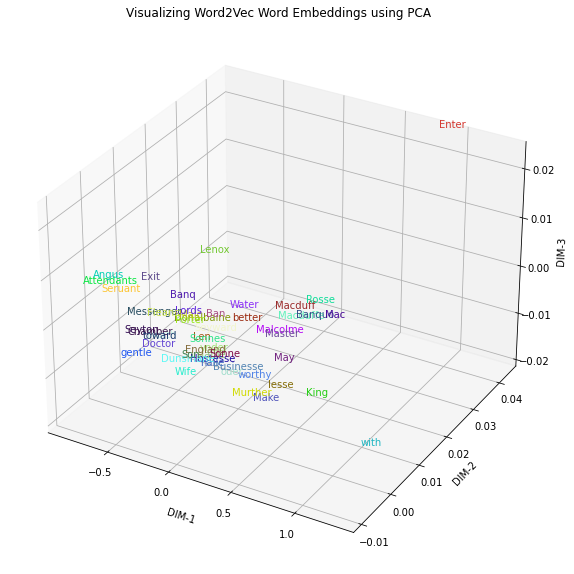

In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import random
import numpy as np

# np.random.seed(42)
# words=list([e for e in model.wv.vocab if len(e)>4]) # plot words longer than 4
# random.shuffle(words)
# words3d = PCA(n_components=3, random_state=42).fit_transform(model.wv[words[:100]])

def plotWords3D(vecs, words, title):
    """
        Parameters
        ----------
        vecs : numpy-array
            Transformed 3D array either by PCA or other techniques
        words: a list of word
            the word list to be mapped
        title: str
            The title of plot     
        """
    fig = plt.figure(figsize=(14,10))
    ax = fig.gca(projection='3d')
    for w, vec in zip(words, vecs):
        ax.text(vec[0],vec[1],vec[2], w, color=np.random.rand(3,))
    ax.set_xlim(min(vecs[:,0]), max(vecs[:,0]))
    ax.set_ylim(min(vecs[:,1]), max(vecs[:,1]))
    ax.set_zlim(min(vecs[:,2]), max(vecs[:,2]))
    ax.set_xlabel('DIM-1')
    ax.set_ylabel('DIM-2')
    ax.set_zlabel('DIM-3')
    plt.title(title)
    plt.show()
plotWords3D(words3d, words, "Visualizing Word2Vec Word Embeddings using PCA")

## FastText

In [17]:
!pip install fasttext

     |████████████████████████████████| 71kB 5.3MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3095208 sha256=0b34603ab1f6efb2cbf26315aec8f1e7058494bc91cb4ecac1a8337e19dc6506
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built fasttext


In [18]:
#Parameters min_n and max_n take control the lengths of character ngrams. 
#If max_n is set to 0, no character ngrams are used, and the model turns out to be Word2Vec.


/tmp/ipykernel_20673/2127240190.py:23: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


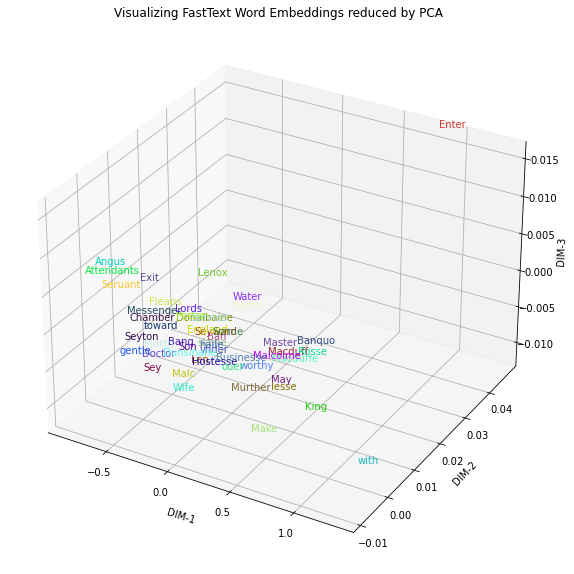

In [14]:
from gensim.models import FastText
model = FastText(sentences=macbeth, vector_size=100, window=5, min_count=5,  workers=4, epochs=10,word_ngrams=1)
#min_n: min length of char ngrams (Default 3)
#max_n: max length of char ngrams (Default 6)

np.random.seed(42)
words=[w[0] for w in model.wv.similar_by_word("Macbeth",50)]
words3d = PCA(n_components=3, random_state=42).fit_transform(model.wv[words])
plotWords3D(words3d, words, "Visualizing FastText Word Embeddings reduced by PCA")

In [21]:
## Glove

In [16]:
import gensim.downloader as api
info = api.info()  # show info about available models/datasets
model = api.load("glove-twitter-25")  # download the model and return as object ready for use

[==================================================] 100.0% 104.8/104.8MB downloaded


In [15]:
model.most_similar("java")

AttributeError: 'FastText' object has no attribute 'most_similar'

# LSTM Training

In [17]:
import numpy as np
import tensorflow as tf

SST-2: This is a fully labeled parse tree that allows for complete sentiment analysis in English. The corpus originally consists of about 12K single sentences extracted from movie reviews. It was parsed with the Stanford parser and includes over 200K unique phrases, each annotated by three human judges. For more information, see Socher et al., [Parsing With Compositional Vector Grammars, EMNLP. 2013](https://nlp.stanford.edu/sentiment).

In [18]:
!wget https://dl.fbaipublicfiles.com/glue/data/SST-2.zip 
!unzip SST-2.zip

/bin/bash: /home/guy/anaconda3/envs/mastrans/lib/libtinfo.so.6: no version information available (required by /bin/bash)
wget: /home/guy/anaconda3/envs/mastrans/lib/libuuid.so.1: no version information available (required by wget)
--2022-08-06 12:56:10--  https://dl.fbaipublicfiles.com/glue/data/SST-2.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 2606:4700:10::ac43:904, 2606:4700:10::6816:4a8e, 2606:4700:10::6816:4b8e, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|2606:4700:10::ac43:904|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7439277 (7.1M) [application/zip]
Saving to: ‘SST-2.zip’

SST-2.zip           100%[===================>]   7.09M  5.10MB/s    in 1.4s    

2022-08-06 12:56:12 (5.10 MB/s) - ‘SST-2.zip’ saved [7439277/7439277]

/bin/bash: /home/guy/anaconda3/envs/mastrans/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Archive:  SST-2.zip
   creating: SST-2/
  inflating: SST-2/dev.ts

In [19]:
import pandas as pd 
df=pd.read_csv('SST-2/train.tsv',sep="\t")
sentences=df.sentence
labels=df.label

In [20]:
df.head(3)

,sentence,label
0,hide new secretions from the parental units,0
1,"contains no wit , only labored gags",0
2,that loves its characters and communicates som...,1


In [21]:
max_sen_len=max([len(s.split()) for s in sentences])
words = ["PAD"]+list(set([w for s in sentences for w in s.split()]))
word2idx= {w:i for i,w in enumerate(words)}
max_words=max(word2idx.values())+1
idx2word= {i:w for i,w in enumerate(words)}
# preparing training set
train=[list(map(lambda x:word2idx[x], s.split())) for s in sentences]

In [22]:
len(train), len(labels)

(67349, 67349)

In [23]:
sum(labels), len(labels), sum(labels)/ len(labels)

(37569, 67349, 0.5578256544269403)

Sequences that are shorter than max_sen_len (maximum sentence length) are padded with a PAD value until they are max_sen_len in length. On the other hand, longer sequences are truncated so that they fit max_sen_len. Here is the implementation

In [26]:
# from keras import preprocessing
from keras.utils import pad_sequences
train_pad = pad_sequences(train, maxlen=max_sen_len)
print('train shape:', train_pad.shape)

train shape: (67349, 52)


In [27]:
print(train_pad)

[[    0     0     0 ...  9705  8984  5723]
 [    0     0     0 ...  6049 12678 13744]
 [    0     0     0 ...  7917  5384 10747]
 ...
 [    0     0     0 ...  1027  7274  8782]
 [    0     0     0 ... 12928  1506 14468]
 [    0     0     0 ...  9705  5222 10156]]


In [28]:
from keras.layers import LSTM, Embedding, Dense
from keras.models import Sequential

model = Sequential()
model.add(Embedding(max_words, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(train_pad,labels, epochs=15, batch_size=16, validation_split=0.2)

2022-08-06 13:05:19.339077: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-06 13:05:19.381342: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-06 13:05:19.381944: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-06 13:05:19.383239: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/15


2022-08-06 13:05:22.274598: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


3368/3368 [==============================] - 14s 3ms/step - loss: 0.4386 - acc: 0.7879 - val_loss: 0.3604 - val_acc: 0.8497
Epoch 2/15
3368/3368 [==============================] - 11s 3ms/step - loss: 0.2965 - acc: 0.8772 - val_loss: 0.2998 - val_acc: 0.8753
Epoch 3/15
3368/3368 [==============================] - 11s 3ms/step - loss: 0.2558 - acc: 0.8966 - val_loss: 0.2794 - val_acc: 0.8835
Epoch 4/15
3368/3368 [==============================] - 11s 3ms/step - loss: 0.2267 - acc: 0.9114 - val_loss: 0.2652 - val_acc: 0.8944
Epoch 5/15
3368/3368 [==============================] - 11s 3ms/step - loss: 0.2060 - acc: 0.9204 - val_loss: 0.2519 - val_acc: 0.8997
Epoch 6/15
3368/3368 [==============================] - 11s 3ms/step - loss: 0.1920 - acc: 0.9259 - val_loss: 0.2465 - val_acc: 0.9047
Epoch 7/15
3368/3368 [==============================] - 11s 3ms/step - loss: 0.1802 - acc: 0.9307 - val_loss: 0.2448 - val_acc: 0.9061
Epoch 8/15
3368/3368 [==============================] - 11s 3ms/st

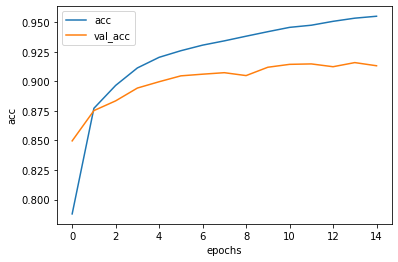

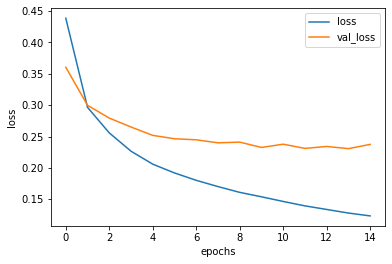

In [29]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'acc')
plot_graphs(history, 'loss')

## Using CNN


In [30]:
from keras import layers


In [31]:
layers.Conv1D

Init signature:
layers.Embedding(
    input_dim,
    output_dim,
    embeddings_initializer='uniform',
    embeddings_regularizer=None,
    activity_regularizer=None,
    embeddings_constraint=None,
    mask_zero=False,
    input_length=None,
    **kwargs,
)
Docstring:     
Turns positive integers (indexes) into dense vectors of fixed size.

e.g. `[[4], [20]] -> [[0.25, 0.1], [0.6, -0.2]]`

This layer can only be used on positive integer inputs of a fixed range. The
`tf.keras.layers.TextVectorization`, `tf.keras.layers.StringLookup`,
and `tf.keras.layers.IntegerLookup` preprocessing layers can help prepare
inputs for an `Embedding` layer.

This layer accepts `tf.Tensor` and `tf.RaggedTensor` inputs. It cannot be
called with `tf.SparseTensor` input.

Example:

>>> model = tf.keras.Sequential()
>>> model.add(tf.keras.layers.Embedding(1000, 64, input_length=10))
>>> # The model will take as input an integer matrix of size (batch,
>>> # input_length), and the largest integer (i.e. word ind

In [32]:
from keras import layers
model = Sequential()
model.add(layers.Embedding(max_words, 32, input_length=max_sen_len))
model.add(layers.Conv1D(32, 8, activation='relu'))
model.add(layers.MaxPooling1D(4))
model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', metrics=['acc'])
history = model.fit(train_pad,labels, epochs=15, batch_size=32, validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 52, 32)            474144    
                                                                 
 conv1d (Conv1D)             (None, 45, 32)            8224      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 11, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 9, 32)             3104      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_1 (Dense)             (None, 1)                

2022-08-06 14:03:38.784947: W tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.


1684/1684 [==============================] - 6s 3ms/step - loss: 0.4695 - acc: 0.7613 - val_loss: 0.3758 - val_acc: 0.8248
Epoch 2/15
1684/1684 [==============================] - 4s 3ms/step - loss: 0.3272 - acc: 0.8509 - val_loss: 0.3309 - val_acc: 0.8504
Epoch 3/15
1684/1684 [==============================] - 4s 3ms/step - loss: 0.2800 - acc: 0.8725 - val_loss: 0.3217 - val_acc: 0.8558
Epoch 4/15
1684/1684 [==============================] - 4s 3ms/step - loss: 0.2492 - acc: 0.8862 - val_loss: 0.3034 - val_acc: 0.8640
Epoch 5/15
1684/1684 [==============================] - 4s 2ms/step - loss: 0.2279 - acc: 0.8961 - val_loss: 0.2966 - val_acc: 0.8670
Epoch 6/15
1684/1684 [==============================] - 4s 3ms/step - loss: 0.2124 - acc: 0.9032 - val_loss: 0.2953 - val_acc: 0.8698
Epoch 7/15
1684/1684 [==============================] - 4s 3ms/step - loss: 0.2002 - acc: 0.9073 - val_loss: 0.3111 - val_acc: 0.8668
Epoch 8/15
1684/1684 [==============================] - 4s 2ms/step - los

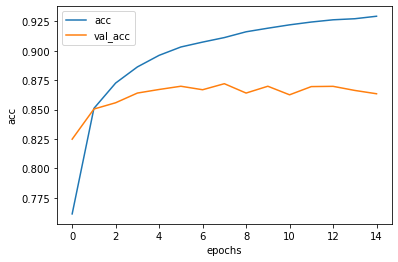

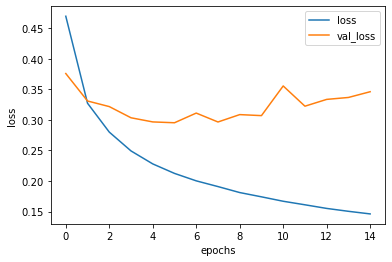

In [33]:
plot_graphs(history, 'acc')
plot_graphs(history, 'loss')

keras-vis                     0.4.1         
